# Predicting grayscale images of letters P - Z.

The assignment consists on the prediction of grayscale images of letters P - Z.

Assignment di:
  **Artemisia Sarteschi Matricola 829677**

##Inspecting the data


Importo le librerie necessarie

In [123]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers.core import Dense, Dropout
from keras.layers import Input
import collections
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Importo i dati

In [124]:
x_train = pickle.load(open("x_train.obj","rb"))
x_test  = pickle.load(open("x_test.obj","rb"))
y_train = pickle.load(open("y_train.obj","rb"))

Visualizzo il formato di y_train per capire se sia necessario convertirlo ed il numero delle categorie in cui è diviso.

In [125]:
print(y_train)

[18 21 17 ... 20 20 16]


In [57]:
print('Number of categories:',len(set(y_train)))

Number of categories: 11


In [58]:
set(y_train)

{16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}

Visualizzo e valuto quindi le dimensioni di tutti dati forniti e noto che ogni immagine è 28*28

In [59]:
x_train.shape, x_test.shape, y_train.shape

((14000, 28, 28), (8800, 28, 28), (14000,))

In [60]:
x_train[0].shape, 28*28, np.min(x_train[0]), np.max(x_train[0])

((28, 28), 784, 0, 255)

Controllo quindi la distribuzione del target e noto che una categoria è composta da meno elementi rispetto alle altre, ma guardando alla numerosità dei campioni decido di non bilanciarle in quanto la differenza non è sostanziale.

<BarContainer object of 11 artists>

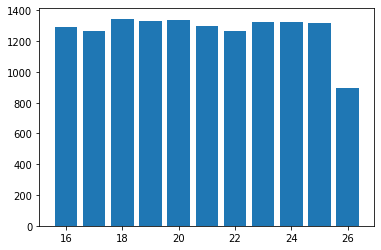

In [61]:
count_cat = collections.Counter(y_train)
count_cat_most = count_cat.most_common()
x,y = zip(*count_cat_most)
plt.bar(x,y)

## Preparing the data

Modifico i dati in modo da portarli in uno stesso formato

In [62]:
x_train = x_train.reshape(14000, 784)
x_test = x_test.reshape(8800, 784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

Trasformo le immagini nella scala dei grigi per elaborarle meglio

In [ ]:
x_train /= 255
x_test /= 255

Coverto il target in una matrice binaria (one hot encode)

In [ ]:
Y_train =  np_utils.to_categorical(y_train, 27)

In [63]:
y_train[0]

18

In [64]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Divido i dati fortniti tra effettivo train e validation che verranno utilizzati successivamente

In [65]:
XX_train, XX_val, YY_train, YY_val = train_test_split(x_train, Y_train,test_size=0.1, random_state=1 )

In [66]:
print('Size of the train set:', XX_train.shape)

Size of the train set: (12600, 784)


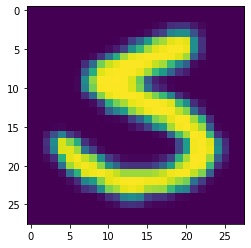

In [67]:
plt.imshow(XX_train[10].reshape(28, 28))

# 1. The resolution of the problem of supervised classification with a traditional neural network [Mandatory]


## Building the network


any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. optimizer choice, final activations, loss functions, training metrics)

Inizializzo le variabili di cui ho necessità durante la costruzione e il train delle varie reti

In [68]:
dims = XX_train.shape[1]
nb_classes = 27
initializer = tf.keras.initializers.GlorotUniform(seed=7) 
n_epochs =100

Costruisco il primo modello senza l'utilizzo di nessuna regularization e successivamente con Dropout per valutare un miglioramento.

In [81]:
model = Sequential()
model.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
model.add(Dense(256, activation = "relu", kernel_initializer=initializer))
model.add(Dense(128, activation = "relu", kernel_initializer=initializer))
model.add(Dense(64, activation = "relu", kernel_initializer=initializer))
model.add(Dense(nb_classes, activation = "softmax", kernel_initializer=initializer))

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 512)               401920    
                                                                 
 dense_46 (Dense)            (None, 256)               131328    
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 27)                1755      
                                                                 
Total params: 576,155
Trainable params: 576,155
Non-trainable params: 0
_________________________________________________________________


In [83]:
network_history = model.fit(XX_train, YY_train, batch_size=128,  epochs=n_epochs, verbose=2,validation_data = (XX_val, YY_val))

Epoch 1/100
99/99 - 2s - loss: 3.2792 - accuracy: 0.0077 - val_loss: 3.2479 - val_accuracy: 0.0121 - 2s/epoch - 16ms/step
Epoch 2/100
99/99 - 1s - loss: 3.2209 - accuracy: 0.0197 - val_loss: 3.1892 - val_accuracy: 0.0207 - 1s/epoch - 11ms/step
Epoch 3/100
99/99 - 1s - loss: 3.1577 - accuracy: 0.0302 - val_loss: 3.1244 - val_accuracy: 0.0336 - 1s/epoch - 11ms/step
Epoch 4/100
99/99 - 1s - loss: 3.0873 - accuracy: 0.0484 - val_loss: 3.0521 - val_accuracy: 0.0636 - 1s/epoch - 11ms/step
Epoch 5/100
99/99 - 1s - loss: 3.0087 - accuracy: 0.0927 - val_loss: 2.9709 - val_accuracy: 0.1350 - 1s/epoch - 11ms/step
Epoch 6/100
99/99 - 1s - loss: 2.9203 - accuracy: 0.1852 - val_loss: 2.8804 - val_accuracy: 0.2236 - 1s/epoch - 11ms/step
Epoch 7/100
99/99 - 1s - loss: 2.8226 - accuracy: 0.2549 - val_loss: 2.7822 - val_accuracy: 0.2579 - 1s/epoch - 11ms/step
Epoch 8/100
99/99 - 1s - loss: 2.7186 - accuracy: 0.2739 - val_loss: 2.6788 - val_accuracy: 0.2729 - 1s/epoch - 11ms/step
Epoch 9/100
99/99 - 1s -

**Droupout**
Inizializzo la rete con il dropout che comparato con le altre regolarizazioni L1 e L2 ha fornito dei risultati migliori

In [78]:
model_d = Sequential()
model_d.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
model_d.add(Dense(256, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.3))
model_d.add(Dense(64, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.2))
model_d.add(Dense(32, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.1))
model_d.add(Dense(nb_classes, activation = "softmax", kernel_initializer=initializer))

model_d.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


In [79]:
model_d.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                16448     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)               

In [80]:
model_d_history = model_d.fit(XX_train, YY_train, batch_size=128, epochs=n_epochs, verbose=2,validation_data=(XX_val,YY_val))

Epoch 1/100
99/99 - 2s - loss: 3.3336 - accuracy: 0.0351 - val_loss: 3.2827 - val_accuracy: 0.0607 - 2s/epoch - 17ms/step
Epoch 2/100
99/99 - 1s - loss: 3.2843 - accuracy: 0.0565 - val_loss: 3.2428 - val_accuracy: 0.1129 - 1s/epoch - 11ms/step
Epoch 3/100
99/99 - 1s - loss: 3.2475 - accuracy: 0.0837 - val_loss: 3.2067 - val_accuracy: 0.1407 - 1s/epoch - 11ms/step
Epoch 4/100
99/99 - 1s - loss: 3.2079 - accuracy: 0.1002 - val_loss: 3.1702 - val_accuracy: 0.1507 - 1s/epoch - 11ms/step
Epoch 5/100
99/99 - 1s - loss: 3.1706 - accuracy: 0.1124 - val_loss: 3.1311 - val_accuracy: 0.1571 - 1s/epoch - 11ms/step
Epoch 6/100
99/99 - 1s - loss: 3.1298 - accuracy: 0.1190 - val_loss: 3.0871 - val_accuracy: 0.1607 - 1s/epoch - 11ms/step
Epoch 7/100
99/99 - 1s - loss: 3.0878 - accuracy: 0.1218 - val_loss: 3.0372 - val_accuracy: 0.1579 - 1s/epoch - 11ms/step
Epoch 8/100
99/99 - 1s - loss: 3.0414 - accuracy: 0.1320 - val_loss: 2.9799 - val_accuracy: 0.1586 - 1s/epoch - 11ms/step
Epoch 9/100
99/99 - 1s -

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

Di seguito si può vedere il plot dei risultati del training non utilizzando una regolarizazione e possiamo vedere che la curva creata senza regularization appare migliore rispetto a quella di Dropout

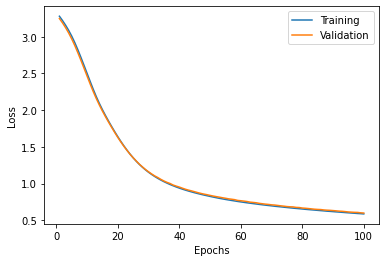

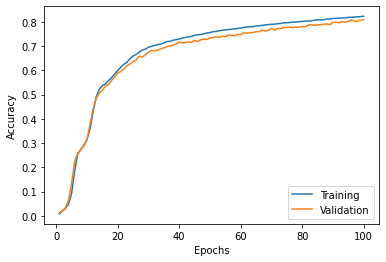

In [84]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.ylim(0.6,0.8)#just for better viz
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


plot_history(network_history)

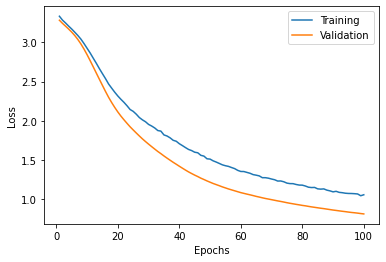

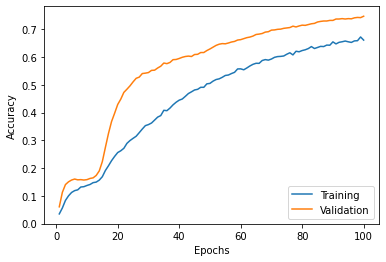

In [85]:
x_plot = list(range(1,n_epochs+1))

def plot_history(model_d_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.ylim(0.6,0.8)#just for better viz
    plt.plot(x_plot, model_d_history.history['loss'])
    plt.plot(x_plot, model_d_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, model_d_history.history['accuracy'])
    plt.plot(x_plot, model_d_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


plot_history(model_d_history)

## Validate the model and comment the result

Valuto numericamente oltre che con le curve al punto precedente le performance dei due modelli, si può notare che anche numericamente il modello non regolarizzato performi meglio.

In [88]:
score = model.evaluate(XX_val, YY_val, batch_size=128)


11/11 [==============================] - 0s 6ms/step - loss: 0.5996 - accuracy: 0.8086


In [95]:
y_classes_evalutation= model.predict(XX_val)

In [98]:
o = y_classes_evalutation.argmax(axis=-1)

In [102]:
val_y=YY_val.argmax(axis=-1)

In [103]:
print(classification_report(o,val_y))

              precision    recall  f1-score   support

          16       0.84      0.78      0.81       144
          17       0.74      0.80      0.77       120
          18       0.73      0.77      0.75       113
          19       0.86      0.94      0.90       114
          20       0.72      0.67      0.69       156
          21       0.85      0.87      0.86       123
          22       0.76      0.80      0.78       128
          23       0.91      0.89      0.90       153
          24       0.81      0.82      0.82       112
          25       0.79      0.76      0.78       147
          26       0.90      0.86      0.88        90

    accuracy                           0.81      1400
   macro avg       0.81      0.81      0.81      1400
weighted avg       0.81      0.81      0.81      1400



In [105]:
score = model_d.evaluate(XX_val, YY_val, batch_size=128)
y_classes_evalutation= model_d.predict(XX_val)
o = y_classes_evalutation.argmax(axis=-1)
val_y=YY_val.argmax(axis=-1)
print(classification_report(o,val_y))

11/11 [==============================] - 0s 6ms/step - loss: 0.8132 - accuracy: 0.7471
              precision    recall  f1-score   support

          16       0.75      0.70      0.73       142
          17       0.69      0.75      0.72       118
          18       0.69      0.62      0.65       132
          19       0.90      0.90      0.90       124
          20       0.51      0.52      0.51       140
          21       0.80      0.76      0.78       133
          22       0.68      0.77      0.72       120
          23       0.92      0.88      0.90       157
          24       0.84      0.78      0.81       122
          25       0.71      0.74      0.72       136
          26       0.76      0.86      0.80        76

    accuracy                           0.75      1400
   macro avg       0.75      0.75      0.75      1400
weighted avg       0.75      0.75      0.75      1400



## Make predictions (on the provided test set)

Date le performance precedenti sul validation set mi aspetto che il modello performi bene su dati che non gli sono mai stati passati.

In [110]:
predictions = model.predict(x_test)
print('predictions shape:', predictions.shape)

predictions shape: (8800, 27)


## [OPTIONAL] -- Export the predictions in the format indicated in the assignment release page.

In [112]:
prediction_print=predictions.argmax(axis=-1)

In [114]:
unique, counts = np.unique(prediction_print, return_counts=True)
dict(zip(unique, counts))

{16: 834,
 17: 783,
 18: 786,
 19: 767,
 20: 840,
 21: 814,
 22: 811,
 23: 858,
 24: 792,
 25: 817,
 26: 698}

In [115]:
np.savetxt("Artemisia_Sarteschi_829677_score2.txt",prediction_print, fmt='%-d')

# 2. The developement of a simple auto-encoder model  [Mandatory]
visually investigating  the reconstruction abilities of such an architecture, i.e. comparison of the input and the output (reconstructed input) (as seen in class).

## Building the network

L'idea dell'autoeconder è quella di mappare dal numero di feature in input (784) in 64 per comprimere l'informazione

In [116]:
encoding_dim = 64  
input_img = Input(shape=(784,)) 
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [118]:
autoencoder.compile(optimizer="adam", loss='binary_crossentropy', metrics = ["mse"])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_50 (Dense)            (None, 64)                50240     
                                                                 
 dense_51 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [119]:
history_autoencoder = autoencoder.fit(XX_train,XX_train,epochs=n_epochs, batch_size=1024,shuffle=True, validation_data=(XX_val, XX_val))

Epoch 1/100
13/13 [==============================] - 1s 49ms/step - loss: 0.6436 - mse: 0.1928 - val_loss: 0.5293 - val_mse: 0.1400
Epoch 2/100
13/13 [==============================] - 1s 40ms/step - loss: 0.4469 - mse: 0.1079 - val_loss: 0.3874 - val_mse: 0.0890
Epoch 3/100
13/13 [==============================] - 1s 40ms/step - loss: 0.3699 - mse: 0.0853 - val_loss: 0.3583 - val_mse: 0.0831
Epoch 4/100
13/13 [==============================] - 1s 39ms/step - loss: 0.3472 - mse: 0.0793 - val_loss: 0.3386 - val_mse: 0.0765
Epoch 5/100
13/13 [==============================] - 1s 40ms/step - loss: 0.3275 - mse: 0.0723 - val_loss: 0.3199 - val_mse: 0.0698
Epoch 6/100
13/13 [==============================] - 1s 39ms/step - loss: 0.3093 - mse: 0.0658 - val_loss: 0.3031 - val_mse: 0.0638
Epoch 7/100
13/13 [==============================] - 1s 39ms/step - loss: 0.2931 - mse: 0.0601 - val_loss: 0.2886 - val_mse: 0.0587
Epoch 8/100
13/13 [==============================] - 0s 38ms/step - loss: 0.

Possiamo visualizzare tramite i grafici seguenti come l'autoencoder sia performante

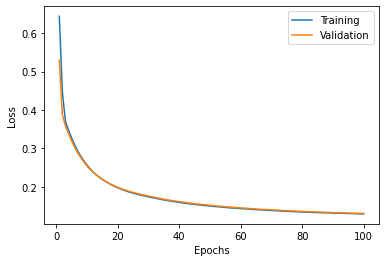

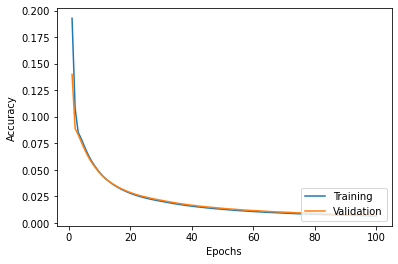

In [120]:
x_plot = list(range(1,n_epochs+1))

def plot_history(history_autoencoder):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, history_autoencoder.history['loss'])
    plt.plot(x_plot, history_autoencoder.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, history_autoencoder.history['mse'])
    plt.plot(x_plot, history_autoencoder.history['val_mse'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


plot_history(history_autoencoder)

## Inspecting the visual results 

I risultati prodotti dall'autoencoder che si possono visualizzare sotto sono molto buoni, da cui possiamo dedurre il corretto funzionamento dell'aoutencoder.

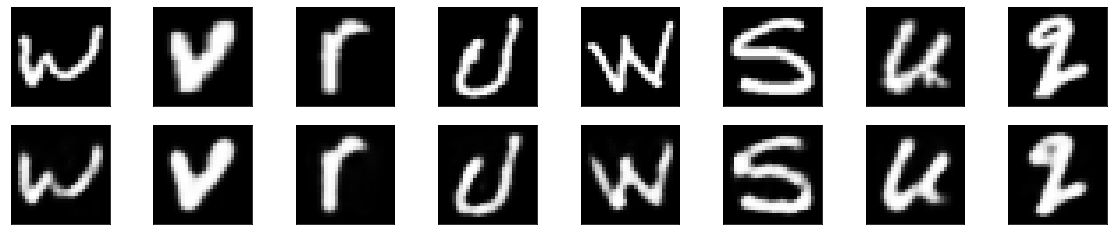

In [121]:
x_selected = XX_val

decoded_imgs = autoencoder.predict(x_selected)
n = 8 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_selected[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3. [OPTIONAL] The use and evaluation of the encoded representation generated by the auto-encoder to solve the problem of supervised classification.

the idea is to take the encoded representation generated by the autoencoder developed in Section 2., and classify letters based on this representation.

In other words, instead of feeding images directly thought a classifier (can be a Neural Network, but also a machine learning algorithm such as SVM, RF..), you can try to use the encoded representations as input for the classification task.

Briefly compare the results with those obtained in Section 1.